In [1]:
from pathlib import Path
import torch
from torch.utils.data import DataLoader
from data_preprocessing import preprocess
from data import BrainDataset
from data_descriptor import BrainAEDataDescriptor
from denoising import denoising
from evaluate import evaluate
from visualisation import visualise_reconstruction

In [2]:
raw_data_path = Path("BraTS2021_Data")  # Path to 3D MRI (.nii.gz) files
preprocess(raw_data_path)

Patients in train]: 938


100%|██████████| 938/938 [39:51<00:00,  2.55s/it]


Patients in val]: 62


100%|██████████| 62/62 [02:37<00:00,  2.55s/it]


Patients in test]: 251


100%|██████████| 251/251 [10:04<00:00,  2.41s/it]


In [2]:
batch_size = 16
depth = 3             # 64,128,256
width_factor = 6      # 2**6 = 64 initial channels
noise_std = 0.2       # σ = 0.2
noise_res = 16        # coarse noise resolution = 16×16
learning_rate = 1e-4  
n_workers=4

In [3]:
# Load only healthy patients and healthy slices for training the autoencoder
train_data = BrainAEDataDescriptor(n_train_patients=None,
                                   n_val_patients=62,
                                   seed=1,
                                   batch_size=batch_size, 
                                   n_workers=n_workers)

In [4]:
trainer = denoising(
    identifier="con_dae",
    data=train_data,
    lr=learning_rate, 
    depth=depth, 
    wf=width_factor, 
    n_input=4, 
    noise_std=noise_std, 
    noise_res=noise_res, 
    gaussian_noise=True)

In [5]:
mini_test_data = BrainDataset(split="test", n_tumour_patients=251, n_healthy_patients=0)
trainer.train(epoch_len=32, max_epochs=60, val_epoch_len=32, patience=5)

Starting training of con_dae:


  0%|          | 0/60 [00:00<?, ?it/s]


Epoch [1]:  
  trn_loss_loss: 0.016686	


  2%|▏         | 1/60 [06:28<6:21:59, 388.47s/it]

  val_loss_loss: 0.007715	



Epoch [2]:  
  trn_loss_loss: 0.004648	


  3%|▎         | 2/60 [14:55<7:22:43, 457.99s/it]

  val_loss_loss: 0.003107	



Epoch [3]:  
  trn_loss_loss: 0.002506	


  5%|▌         | 3/60 [24:40<8:10:19, 516.12s/it]

  val_loss_loss: 0.002351	



Epoch [4]:  
  trn_loss_loss: 0.002024	


  7%|▋         | 4/60 [35:38<8:54:02, 572.19s/it]

  val_loss_loss: 0.002013	



Epoch [5]:  
  trn_loss_loss: 0.001787	


  8%|▊         | 5/60 [46:38<9:13:35, 603.92s/it]

  val_loss_loss: 0.001736	



Epoch [6]:  
  trn_loss_loss: 0.001719	


 10%|█         | 6/60 [58:20<9:33:20, 637.05s/it]

  val_loss_loss: 0.001579	



Epoch [7]:  
  trn_loss_loss: 0.001409	


 12%|█▏        | 7/60 [1:10:38<9:52:01, 670.22s/it]

  val_loss_loss: 0.001478	



Epoch [8]:  
  trn_loss_loss: 0.001326	


 13%|█▎        | 8/60 [1:23:12<10:03:59, 696.92s/it]

  val_loss_loss: 0.001373	



Epoch [9]:  
  trn_loss_loss: 0.001266	


 15%|█▌        | 9/60 [1:36:23<10:17:21, 726.30s/it]

  val_loss_loss: 0.001372	



Epoch [10]:  
  trn_loss_loss: 0.001252	


 17%|█▋        | 10/60 [1:49:13<10:16:21, 739.63s/it]

  val_loss_loss: 0.001263	



Epoch [11]:  
  trn_loss_loss: 0.001228	


 18%|█▊        | 11/60 [2:02:49<10:23:07, 763.02s/it]

  val_loss_loss: 0.001218	



Epoch [12]:  
  trn_loss_loss: 0.001139	


 20%|██        | 12/60 [2:16:49<10:29:19, 786.66s/it]

  val_loss_loss: 0.001210	



Epoch [13]:  
  trn_loss_loss: 0.001109	


 22%|██▏       | 13/60 [2:31:36<10:39:55, 816.92s/it]

  val_loss_loss: 0.001174	



Epoch [14]:  
  trn_loss_loss: 0.001066	


 23%|██▎       | 14/60 [2:47:04<10:52:06, 850.58s/it]

  val_loss_loss: 0.001134	



Epoch [15]:  
  trn_loss_loss: 0.001074	


 25%|██▌       | 15/60 [3:02:24<10:53:28, 871.30s/it]

  val_loss_loss: 0.001095	



Epoch [16]:  
  trn_loss_loss: 0.001010	


 27%|██▋       | 16/60 [3:17:31<10:46:52, 882.11s/it]

  val_loss_loss: 0.001077	



Epoch [17]:  
  trn_loss_loss: 0.000959	


 28%|██▊       | 17/60 [3:32:46<10:39:23, 892.17s/it]

  val_loss_loss: 0.001004	



Epoch [18]:  
  trn_loss_loss: 0.000990	


 30%|███       | 18/60 [3:48:30<10:35:15, 907.51s/it]

  val_loss_loss: 0.001024	



Epoch [19]:  
  trn_loss_loss: 0.000939	
  val_loss_loss: 0.000992	


 32%|███▏      | 19/60 [4:04:34<10:31:49, 924.63s/it]




Epoch [20]:  
  trn_loss_loss: 0.000943	


 33%|███▎      | 20/60 [4:20:45<10:25:39, 938.48s/it]

  val_loss_loss: 0.000980	



Epoch [21]:  
  trn_loss_loss: 0.000976	


 35%|███▌      | 21/60 [4:36:40<10:13:16, 943.51s/it]

  val_loss_loss: 0.000964	



Epoch [22]:  
  trn_loss_loss: 0.000889	


 37%|███▋      | 22/60 [4:52:42<10:00:58, 948.92s/it]

  val_loss_loss: 0.000963	



Epoch [23]:  
  trn_loss_loss: 0.000937	


 38%|███▊      | 23/60 [5:08:45<9:47:46, 953.16s/it] 

  val_loss_loss: 0.000984	



Epoch [24]:  
  trn_loss_loss: 0.000915	


 40%|████      | 24/60 [5:24:46<9:33:25, 955.70s/it]

  val_loss_loss: 0.000933	



Epoch [25]:  
  trn_loss_loss: 0.000875	


 42%|████▏     | 25/60 [5:41:07<9:21:47, 963.06s/it]

  val_loss_loss: 0.000928	



Epoch [26]:  
  trn_loss_loss: 0.000858	


 43%|████▎     | 26/60 [5:57:41<9:11:07, 972.58s/it]

  val_loss_loss: 0.000953	



Epoch [27]:  
  trn_loss_loss: 0.000835	


 45%|████▌     | 27/60 [6:14:14<8:58:14, 978.61s/it]

  val_loss_loss: 0.000952	



Epoch [28]:  
  trn_loss_loss: 0.000885	


 47%|████▋     | 28/60 [6:31:02<8:46:40, 987.51s/it]

  val_loss_loss: 0.000884	



Epoch [29]:  
  trn_loss_loss: 0.000855	


 48%|████▊     | 29/60 [6:48:07<8:35:55, 998.57s/it]

  val_loss_loss: 0.000897	



Epoch [30]:  
  trn_loss_loss: 0.000823	


 50%|█████     | 30/60 [7:05:26<8:25:20, 1010.69s/it]

  val_loss_loss: 0.000908	



Epoch [31]:  
  trn_loss_loss: 0.000820	


 52%|█████▏    | 31/60 [7:22:39<8:11:47, 1017.50s/it]

  val_loss_loss: 0.000892	



Epoch [32]:  
  trn_loss_loss: 0.000805	


 53%|█████▎    | 32/60 [7:40:09<7:59:22, 1027.24s/it]

  val_loss_loss: 0.000855	



Epoch [33]:  
  trn_loss_loss: 0.000794	


 55%|█████▌    | 33/60 [7:57:25<7:43:27, 1029.93s/it]

  val_loss_loss: 0.000856	



Epoch [34]:  
  trn_loss_loss: 0.000806	


 57%|█████▋    | 34/60 [8:14:37<7:26:29, 1030.35s/it]

  val_loss_loss: 0.000859	



Epoch [35]:  
  trn_loss_loss: 0.000814	


 58%|█████▊    | 35/60 [8:31:35<7:07:49, 1026.79s/it]

  val_loss_loss: 0.000858	



Epoch [36]:  
  trn_loss_loss: 0.000813	


 60%|██████    | 36/60 [8:48:30<6:49:20, 1023.34s/it]

  val_loss_loss: 0.000844	



Epoch [37]:  
  trn_loss_loss: 0.000832	


 62%|██████▏   | 37/60 [9:05:19<6:30:36, 1018.96s/it]

  val_loss_loss: 0.000853	



Epoch [38]:  
  trn_loss_loss: 0.000771	


 63%|██████▎   | 38/60 [9:22:04<6:12:04, 1014.75s/it]

  val_loss_loss: 0.000832	



Epoch [39]:  
  trn_loss_loss: 0.000748	


 65%|██████▌   | 39/60 [9:39:11<5:56:24, 1018.33s/it]

  val_loss_loss: 0.000853	



Epoch [40]:  
  trn_loss_loss: 0.000804	


 67%|██████▋   | 40/60 [9:56:44<5:42:57, 1028.89s/it]

  val_loss_loss: 0.000838	



Epoch [41]:  
  trn_loss_loss: 0.000830	


 68%|██████▊   | 41/60 [10:13:53<5:25:48, 1028.84s/it]

  val_loss_loss: 0.000835	



Epoch [42]:  
  trn_loss_loss: 0.000768	
  val_loss_loss: 0.000825	


 70%|███████   | 42/60 [10:31:07<5:09:08, 1030.48s/it]




Epoch [43]:  
  trn_loss_loss: 0.000747	


 72%|███████▏  | 43/60 [10:48:24<4:52:30, 1032.40s/it]

  val_loss_loss: 0.000836	



Epoch [44]:  
  trn_loss_loss: 0.000742	


 73%|███████▎  | 44/60 [11:05:32<4:34:54, 1030.93s/it]

  val_loss_loss: 0.000809	



Epoch [45]:  
  trn_loss_loss: 0.000719	


 75%|███████▌  | 45/60 [11:23:02<4:19:12, 1036.83s/it]

  val_loss_loss: 0.000797	



Epoch [46]:  
  trn_loss_loss: 0.000765	


 77%|███████▋  | 46/60 [11:40:30<4:02:42, 1040.19s/it]

  val_loss_loss: 0.000805	



Epoch [47]:  
  trn_loss_loss: 0.000750	


 78%|███████▊  | 47/60 [11:57:40<3:44:42, 1037.12s/it]

  val_loss_loss: 0.000809	



Epoch [48]:  
  trn_loss_loss: 0.000751	


 80%|████████  | 48/60 [12:14:51<3:27:01, 1035.16s/it]

  val_loss_loss: 0.000802	



Epoch [49]:  
  trn_loss_loss: 0.000731	


 82%|████████▏ | 49/60 [12:32:07<3:09:49, 1035.38s/it]

  val_loss_loss: 0.000772	



Epoch [50]:  
  trn_loss_loss: 0.000738	


 83%|████████▎ | 50/60 [12:49:07<2:51:49, 1030.98s/it]

  val_loss_loss: 0.000793	



Epoch [51]:  
  trn_loss_loss: 0.000758	


 85%|████████▌ | 51/60 [13:06:25<2:34:57, 1033.03s/it]

  val_loss_loss: 0.000788	



Epoch [52]:  
  trn_loss_loss: 0.000738	


 87%|████████▋ | 52/60 [13:24:12<2:19:06, 1043.25s/it]

  val_loss_loss: 0.000794	



Epoch [53]:  
  trn_loss_loss: 0.000748	


 88%|████████▊ | 53/60 [13:41:42<2:01:55, 1045.06s/it]

  val_loss_loss: 0.000762	



Epoch [54]:  
  trn_loss_loss: 0.000727	


 90%|█████████ | 54/60 [13:58:55<1:44:09, 1041.60s/it]

  val_loss_loss: 0.000758	



Epoch [55]:  
  trn_loss_loss: 0.000705	


 92%|█████████▏| 55/60 [14:15:52<1:26:11, 1034.34s/it]

  val_loss_loss: 0.000781	



Epoch [56]:  
  trn_loss_loss: 0.000701	


 93%|█████████▎| 56/60 [14:32:46<1:08:32, 1028.00s/it]

  val_loss_loss: 0.000770	



Epoch [57]:  
  trn_loss_loss: 0.000694	


 95%|█████████▌| 57/60 [14:49:53<51:23, 1027.90s/it]  

  val_loss_loss: 0.000749	



Epoch [58]:  
  trn_loss_loss: 0.000665	


 97%|█████████▋| 58/60 [15:07:09<34:20, 1030.35s/it]

  val_loss_loss: 0.000750	



Epoch [59]:  
  trn_loss_loss: 0.000680	


 98%|█████████▊| 59/60 [15:24:31<17:13, 1033.70s/it]

  val_loss_loss: 0.000748	



Epoch [60]:  
  trn_loss_loss: 0.000672	


100%|██████████| 60/60 [15:42:00<00:00, 942.01s/it] 

  val_loss_loss: 0.000729	


Stopping due to max epochs condition.


In [6]:
print("--- Epoch = 60 ---")
evaluate(id="con_dae", split="test", use_cc=True, dataset=mini_test_data, pr_curve=False)

--- Epoch = 60 ---


/fs04/gi18/DenoisingAE/trainer.py:227: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)
100%|██████████| 1000/1000 [22:21<00:00,  1.34s/it]



--- Final Evaluation ---
Average Precision (AUPRC): 0.7436
AUCROC: 0.9805
Max Dice: 0.9805
Max Post-CC Dice: 0.0870
Optimal Threshold: 0.6908


(0.7436437858678105,
 0.9804779521017468,
 0.6907861232757568,
 0.087,
 0.6926722526550293,
 tensor([False, False, False,  ..., False, False, False]),
 tensor([False, False, False,  ..., False, False, False]))

In [7]:
trainer.train(epoch_len=32, max_epochs=75, val_epoch_len=32, patience=5)

Starting training of con_dae:


 80%|████████  | 60/75 [00:00<?, ?it/s]


Epoch [61]:  
  trn_loss_loss: 0.000684	


 81%|████████▏ | 61/75 [17:20<4:02:53, 1040.96s/it]

  val_loss_loss: 0.000733	



Epoch [62]:  
  trn_loss_loss: 0.000634	


 83%|████████▎ | 62/75 [34:39<3:45:16, 1039.71s/it]

  val_loss_loss: 0.000722	



Epoch [63]:  
  trn_loss_loss: 0.000701	


 84%|████████▍ | 63/75 [52:01<3:28:09, 1040.78s/it]

  val_loss_loss: 0.000747	



Epoch [64]:  
  trn_loss_loss: 0.000673	


 85%|████████▌ | 64/75 [1:09:18<3:10:29, 1039.06s/it]

  val_loss_loss: 0.000736	



Epoch [65]:  
  trn_loss_loss: 0.000687	


 87%|████████▋ | 65/75 [1:26:35<2:53:04, 1038.44s/it]

  val_loss_loss: 0.000729	



Epoch [66]:  
  trn_loss_loss: 0.000665	
  val_loss_loss: 0.000719	


 88%|████████▊ | 66/75 [1:43:53<2:35:43, 1038.16s/it]




Epoch [67]:  
  trn_loss_loss: 0.000643	


 89%|████████▉ | 67/75 [2:01:25<2:19:01, 1042.72s/it]

  val_loss_loss: 0.000727	



Epoch [68]:  
  trn_loss_loss: 0.000681	


 91%|█████████ | 68/75 [2:19:07<2:02:21, 1048.81s/it]

  val_loss_loss: 0.000740	



Epoch [69]:  
  trn_loss_loss: 0.000644	


 92%|█████████▏| 69/75 [2:36:44<1:45:08, 1051.38s/it]

  val_loss_loss: 0.000717	



Epoch [70]:  
  trn_loss_loss: 0.000645	


 93%|█████████▎| 70/75 [2:54:15<1:27:37, 1051.45s/it]

  val_loss_loss: 0.000723	



Epoch [71]:  
  trn_loss_loss: 0.000644	


 95%|█████████▍| 71/75 [3:11:47<1:10:06, 1051.61s/it]

  val_loss_loss: 0.000713	



Epoch [72]:  
  trn_loss_loss: 0.000618	


 96%|█████████▌| 72/75 [3:29:18<52:34, 1051.46s/it]  

  val_loss_loss: 0.000712	



Epoch [73]:  
  trn_loss_loss: 0.000623	


 97%|█████████▋| 73/75 [3:46:43<34:58, 1049.42s/it]

  val_loss_loss: 0.000719	



Epoch [74]:  
  trn_loss_loss: 0.000657	


 99%|█████████▊| 74/75 [4:04:12<17:29, 1049.35s/it]

  val_loss_loss: 0.000706	



Epoch [75]:  
  trn_loss_loss: 0.000657	


100%|██████████| 75/75 [4:21:52<00:00, 1047.53s/it]

  val_loss_loss: 0.000720	


Stopping due to max epochs condition.


In [8]:
print("--- Epoch = 75 ---")
evaluate(id="con_dae", split="test", use_cc=True, dataset=mini_test_data, pr_curve=False)

--- Epoch = 75 ---


/fs04/gi18/DenoisingAE/trainer.py:227: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)
100%|██████████| 1000/1000 [22:20<00:00,  1.34s/it]



--- Final Evaluation ---
Average Precision (AUPRC): 0.7639
AUCROC: 0.9814
Max Dice: 0.9814
Max Post-CC Dice: 0.0900
Optimal Threshold: 0.7088


(0.7638879620295764,
 0.9813589316770931,
 0.7087645530700684,
 0.09,
 0.7105251550674438,
 tensor([False, False, False,  ..., False, False, False]),
 tensor([False, False, False,  ..., False, False, False]))

In [9]:
trainer.train(epoch_len=32, max_epochs=90, val_epoch_len=32, patience=5)

Starting training of con_dae:


 83%|████████▎ | 75/90 [00:00<?, ?it/s]


Epoch [76]:  
  trn_loss_loss: 0.000657	


 84%|████████▍ | 76/90 [17:49<4:09:39, 1069.93s/it]

  val_loss_loss: 0.000710	



Epoch [77]:  
  trn_loss_loss: 0.000663	


 86%|████████▌ | 77/90 [35:28<3:50:22, 1063.30s/it]

  val_loss_loss: 0.000701	



Epoch [78]:  
  trn_loss_loss: 0.000632	


 87%|████████▋ | 78/90 [53:17<3:33:11, 1065.98s/it]

  val_loss_loss: 0.000692	



Epoch [79]:  
  trn_loss_loss: 0.000644	


 88%|████████▊ | 79/90 [1:10:56<3:14:53, 1063.06s/it]

  val_loss_loss: 0.000709	



Epoch [80]:  
  trn_loss_loss: 0.000612	


 89%|████████▉ | 80/90 [1:28:18<2:55:56, 1055.61s/it]

  val_loss_loss: 0.000695	



Epoch [81]:  
  trn_loss_loss: 0.000636	


 90%|█████████ | 81/90 [1:45:38<2:37:31, 1050.12s/it]

  val_loss_loss: 0.000695	



Epoch [82]:  
  trn_loss_loss: 0.000650	


 91%|█████████ | 82/90 [2:03:14<2:20:16, 1052.05s/it]

  val_loss_loss: 0.000699	



Epoch [83]:  
  trn_loss_loss: 0.000646	
  val_loss_loss: 0.000683	


 92%|█████████▏| 83/90 [2:21:08<2:03:33, 1059.04s/it]




Epoch [84]:  
  trn_loss_loss: 0.000610	


 93%|█████████▎| 84/90 [2:39:04<1:46:26, 1064.50s/it]

  val_loss_loss: 0.000695	



Epoch [85]:  
  trn_loss_loss: 0.000624	


 94%|█████████▍| 85/90 [2:56:56<1:28:53, 1066.78s/it]

  val_loss_loss: 0.000691	



Epoch [86]:  
  trn_loss_loss: 0.000663	


 96%|█████████▌| 86/90 [3:15:00<1:11:27, 1071.90s/it]

  val_loss_loss: 0.000687	



Epoch [87]:  
  trn_loss_loss: 0.000633	
  val_loss_loss: 0.000682	


 97%|█████████▋| 87/90 [3:32:38<53:23, 1067.81s/it]  




Epoch [88]:  
  trn_loss_loss: 0.000640	


 98%|█████████▊| 88/90 [3:50:24<35:34, 1067.10s/it]

  val_loss_loss: 0.000671	



Epoch [89]:  
  trn_loss_loss: 0.000630	


 99%|█████████▉| 89/90 [4:08:08<17:46, 1066.31s/it]

  val_loss_loss: 0.000682	



Epoch [90]:  
  trn_loss_loss: 0.000632	


100%|██████████| 90/90 [4:25:54<00:00, 1063.65s/it]

  val_loss_loss: 0.000696	


Stopping due to max epochs condition.


In [10]:
print("--- Epoch = 90 ---")
evaluate(id="con_dae", split="test", use_cc=True, dataset=mini_test_data, pr_curve=False)

--- Epoch = 90 ---


/fs04/gi18/DenoisingAE/trainer.py:227: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)
100%|██████████| 1000/1000 [22:26<00:00,  1.35s/it]



--- Final Evaluation ---
Average Precision (AUPRC): 0.7555
AUCROC: 0.9808
Max Dice: 0.9808
Max Post-CC Dice: 0.0870
Optimal Threshold: 0.7029


(0.7555010622796153,
 0.980761369729734,
 0.7028807997703552,
 0.087,
 0.7047701478004456,
 tensor([False, False, False,  ..., False, False, False]),
 tensor([False, False, False,  ..., False, False, False]))

In [11]:
trainer.train(epoch_len=32, max_epochs=105, val_epoch_len=32, patience=5)

Starting training of con_dae:


 86%|████████▌ | 90/105 [00:00<?, ?it/s]


Epoch [91]:  
  trn_loss_loss: 0.000610	


 87%|████████▋ | 91/105 [18:09<4:14:16, 1089.78s/it]

  val_loss_loss: 0.000676	



Epoch [92]:  
  trn_loss_loss: 0.000605	


 88%|████████▊ | 92/105 [35:47<3:52:05, 1071.19s/it]

  val_loss_loss: 0.000677	



Epoch [93]:  
  trn_loss_loss: 0.000634	


 89%|████████▊ | 93/105 [53:35<3:33:53, 1069.49s/it]

  val_loss_loss: 0.000690	



Epoch [94]:  
  trn_loss_loss: 0.000647	


 90%|████████▉ | 94/105 [1:11:26<3:16:12, 1070.25s/it]

  val_loss_loss: 0.000672	



Epoch [95]:  
  trn_loss_loss: 0.000608	


 90%|█████████ | 95/105 [1:29:10<2:58:00, 1068.02s/it]

  val_loss_loss: 0.000673	



Epoch [96]:  
  trn_loss_loss: 0.000605	


 91%|█████████▏| 96/105 [1:47:02<2:40:21, 1069.09s/it]

  val_loss_loss: 0.000688	



Epoch [97]:  
  trn_loss_loss: 0.000622	


 92%|█████████▏| 97/105 [2:05:02<2:23:02, 1072.85s/it]

  val_loss_loss: 0.000683	



Epoch [98]:  
  trn_loss_loss: 0.000594	
  val_loss_loss: 0.000665	


 93%|█████████▎| 98/105 [2:22:49<2:04:57, 1071.05s/it]




Epoch [99]:  
  trn_loss_loss: 0.000636	


 94%|█████████▍| 99/105 [2:40:30<1:46:46, 1067.71s/it]

  val_loss_loss: 0.000682	



Epoch [100]:  
  trn_loss_loss: 0.000610	


 95%|█████████▌| 100/105 [2:58:25<1:29:09, 1069.95s/it]

  val_loss_loss: 0.000680	



Epoch [101]:  
  trn_loss_loss: 0.000603	


 96%|█████████▌| 101/105 [3:16:23<1:11:30, 1072.56s/it]

  val_loss_loss: 0.000662	



Epoch [102]:  
  trn_loss_loss: 0.000625	


 97%|█████████▋| 102/105 [3:34:07<53:29, 1069.78s/it]  

  val_loss_loss: 0.000696	



Epoch [103]:  
  trn_loss_loss: 0.000629	


 98%|█████████▊| 103/105 [3:51:53<35:37, 1068.83s/it]

  val_loss_loss: 0.000673	



Epoch [104]:  
  trn_loss_loss: 0.000604	


 99%|█████████▉| 104/105 [4:09:34<17:46, 1066.52s/it]

  val_loss_loss: 0.000672	



Epoch [105]:  
  trn_loss_loss: 0.000633	


100%|██████████| 105/105 [4:27:28<00:00, 1068.74s/it]

  val_loss_loss: 0.000664	


Stopping due to max epochs condition.


100%|██████████| 105/105 [4:27:29<00:00, 1069.94s/it]


In [12]:
print("--- Epoch = 105 ---")
evaluate(id="con_dae", split="test", use_cc=True, dataset=mini_test_data, pr_curve=False)

/fs04/gi18/DenoisingAE/trainer.py:227: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


--- Epoch = 105 ---


100%|██████████| 1000/1000 [22:28<00:00,  1.35s/it]



--- Final Evaluation ---
Average Precision (AUPRC): 0.7560
AUCROC: 0.9807
Max Dice: 0.9807
Max Post-CC Dice: 0.0880
Optimal Threshold: 0.7034


(0.7560108433985833,
 0.9807062122207082,
 0.7034469842910767,
 0.088,
 0.7053086757659912,
 tensor([False, False, False,  ..., False, False, False]),
 tensor([False, False, False,  ..., False, False, False]))

In [13]:
# healthy_data = train_data.get_dataset("train") 
# visualise_reconstruction(trainer, healthy_data, idx=50)

[INFO] Slice 105: Tumor Present (mask pixels = 717.0)


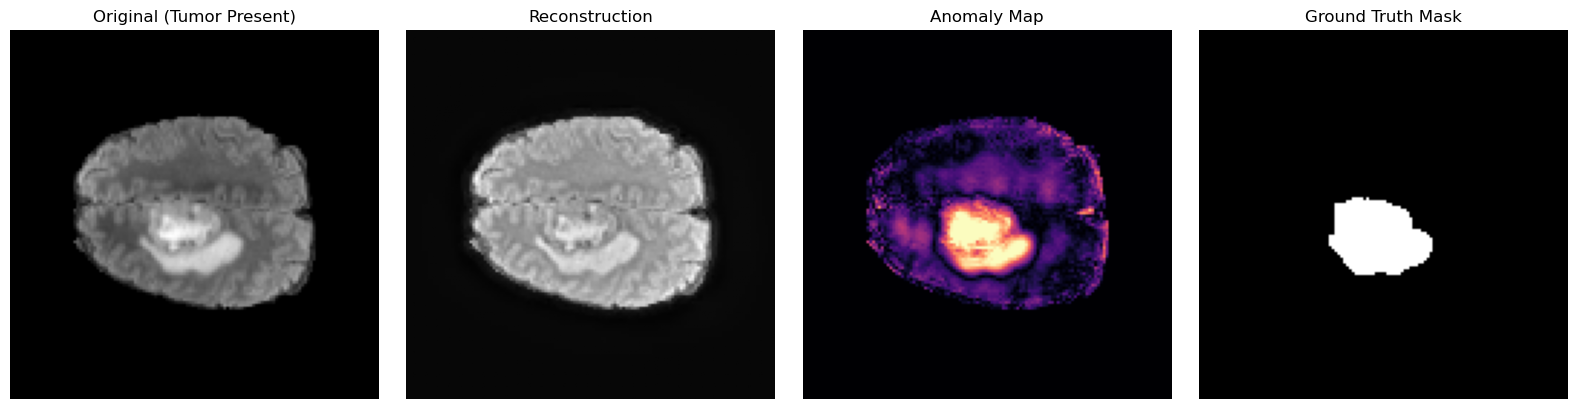

In [14]:
tumour_data = BrainDataset(
    dataset="brats2021",
    split="test",
    n_tumour_patients=10,     
    n_healthy_patients=0)
visualise_reconstruction(trainer, tumour_data, idx=105)

[INFO] Slice 235: Tumor Present (mask pixels = 297.0)


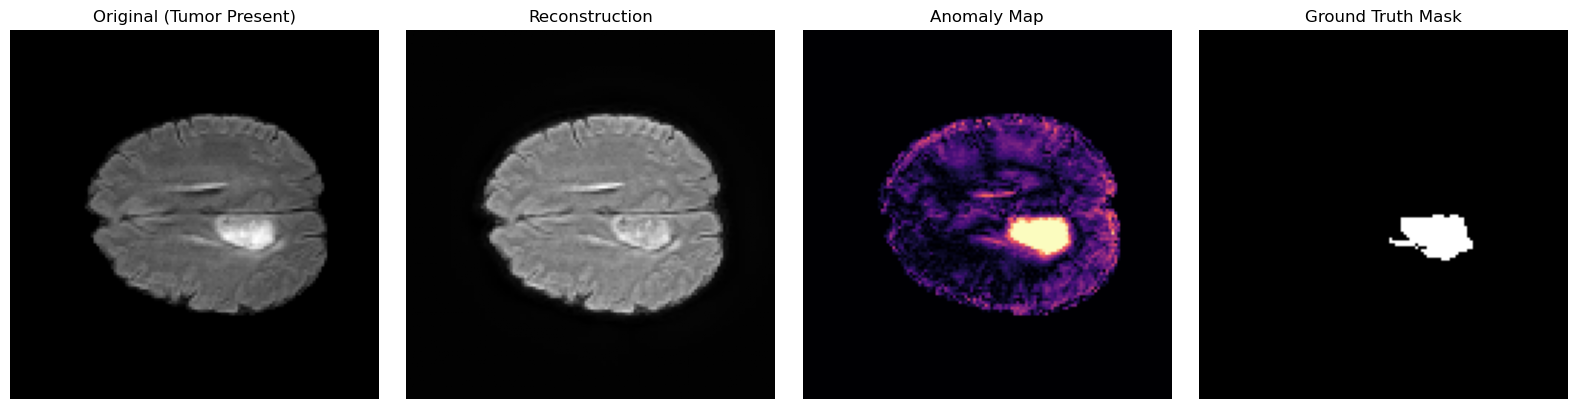

In [15]:
visualise_reconstruction(trainer, tumour_data, idx=235)

[INFO] Slice 345: Tumor Present (mask pixels = 247.0)


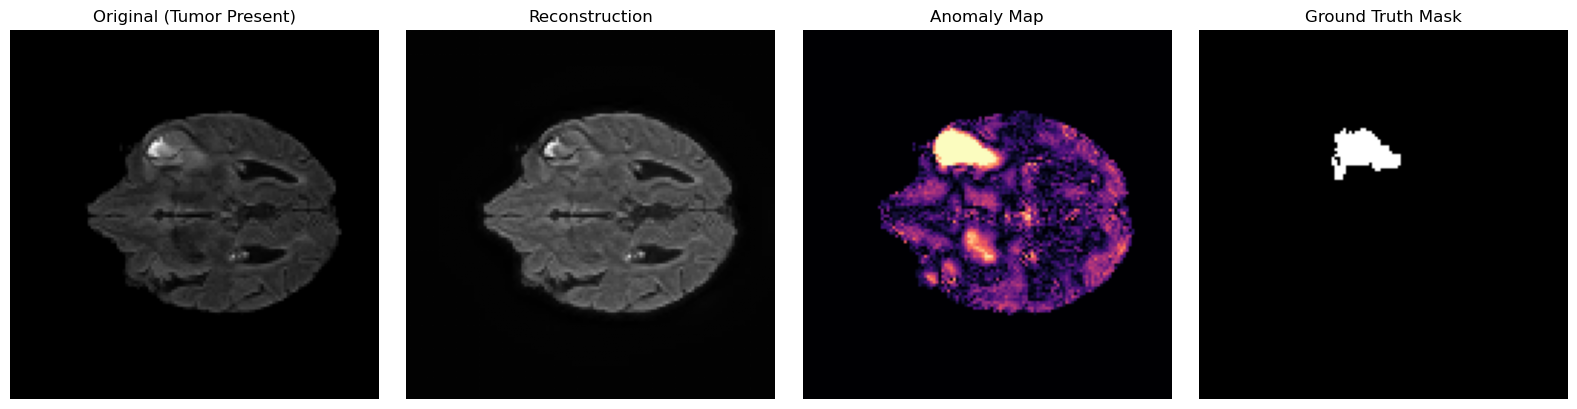

In [16]:
visualise_reconstruction(trainer, tumour_data, idx=345)

[INFO] Slice 107: Tumor Present (mask pixels = 733.0)


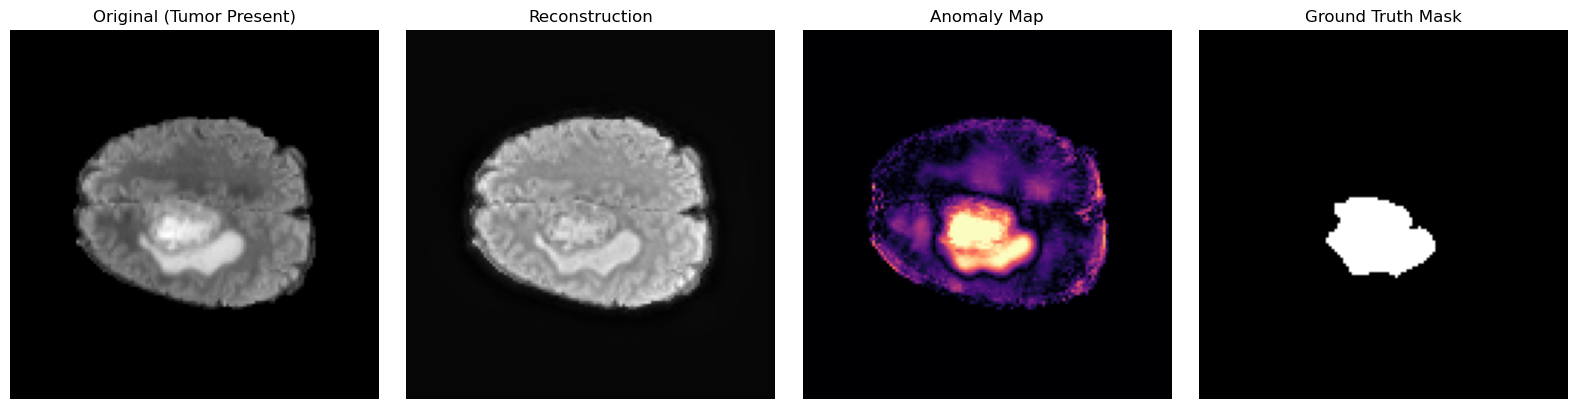

In [17]:
visualise_reconstruction(trainer, tumour_data, idx=107)